In [3]:
"""
Created on 29th March 2018, using VPython notebook
@author: Myriam Munezero

"""
# Import the needed libraries
import vpython as vs 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

%matplotlib inline


In [4]:
# Introduction

# This script explores the Index 2018 Economic Data that is released by the Heritage 
# Foundation: https://www.heritage.org/index/explore
# The Index, which was launched in 1995, evaluates nations in 12 aspects that affect economic freedom 
# grouped into four broad policy areas; 
# 1) Rule of law(property rights, judicial effectiveness, and government integrity); 
# 2) Government size(tax burden, government spending, and fiscal health); 
# 3) Regulatory effeciency (business freedom, labor freedom, and monetary freedom), and
# 4) Market openness (trade freedom, investment freedom, and financial freedom). 

# Scores in these 12 categories are averaged to create an overall 'score'. 
# Based on this average score, nations are classified into five categories; free, mostly free, 
# "moderately free", "mostly unfree", and "repressed",

# In particular, below I explore 1) the distribution of all World countries, African, European, and Asian countries
# among these five categories, 2) the correlations between various economic variables, and 
# 3) the relation between economic freedom, government expenditure and uneployment rates, and
# 4) use linear regression, to explore the relationship between various variables and the 
# "unemployment rate". 

In [5]:
# Loading the 2018 data given by the Heritage Foundation in cvs format. Has been cleaned before importing
data18 = pd.read_csv("index2018_data.csv", sep=";", decimal=",", encoding='ISO-8859-1')
data18.head(n=5)

,CountryID,CountryName,Region,WorldRank,2018Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,Gov'tSpending,...,Gov'tExpenditure%ofGDP,Population(Millions),GDP(Billions.PPP),GDPGrowthRate(%),5YearGDPGrowthRate(%),GDPperCapita(PPP),Unemployment(%),Inflation(%),FDIInflow(Millions),PublicDebt(%ofGDP)
0,1,Afghanistan,Asia-Pacific,154.0,51.3,17.9,28.2,26.2,91.8,79.3,...,26.3,33.4,64.1,1.5,4.4,1918.60,8.5,4.4,99.6,8.3
1,2,Albania,Europe,65.0,64.5,54.1,25.4,39.9,85.1,72.7,...,30.1,2.9,34.2,2.6,2,11840.20,16.3,1.3,1124.3,71.5
2,3,Algeria,North-Africa,172.0,44.7,27.8,35.2,29,74,45.9,...,42.5,40.8,612.5,3.7,3.6,15026.50,11.2,6.4,1546,20.4
3,4,Angola,Sub-Saharan-Africa,164.0,48.6,36,25.4,18.9,82.4,69.1,...,32.1,27.4,187.3,3,4,6844.40,6.6,32.4,14363.6,71.9
4,5,Argentina,Americas,144.0,52.3,40.8,44.5,32.6,65.7,55.6,...,38.5,43.6,874.1,1.2,-0.2,20047.50,6.6,58.4,5745.2,51.3


In [6]:
# Loading the 2017 data given by the Heritage Foundation in cvs format. Has been cleaned
# similarly to the 2018 before importing
data17 = pd.read_csv("index2017_data.csv", sep=";", decimal=",", encoding='ISO-8859-1')
data17.head(n=5)

,CountryID,CountryName,Region,WorldRank,2018Score,PropertyRights,JudicalEffectiveness,GovernmentIntegrity,TaxBurden,Gov'tSpending,...,Gov'tExpenditure%ofGDP,Population(Millions),GDP(Billions.PPP),GDPGrowthRate(%),5YearGDPGrowthRate(%),GDPperCapita(PPP),Unemployment(%),Inflation(%),FDIInflow(Millions),PublicDebt(%ofGDP)
0,1,Afghanistan,Asia-Pacific,163.0,48.89,12.60,28.40,27.50,91.58,79.88,...,27.11,32.0,62.3,1.5,5.4,1947.0,9.6,-1.5,58.0,6.8
1,2,Albania,Europe,65.0,64.35,54.01,28.47,39.71,86.89,72.50,...,30.04,2.8,32.7,2.6,1.9,11300.8,17.3,1.9,1003.3,71.9
2,3,Algeria,North-Africa,172.0,46.53,38.20,29.63,31.70,81.09,50.96,...,44.44,39.5,578.7,3.7,3.3,14503.9,10.5,4.8,-587.3,8.7
3,4,Angola,Sub-Saharan-Africa,165.0,48.52,36.40,19.80,12.80,87.69,58.65,...,28.93,25.1,184.4,3.0,4.7,7343.8,7.6,10.3,8680.9,62.3
4,5,Argentina,Americas,156.0,50.41,32.45,39.58,38.19,62.61,54.64,...,43.95,42.4,972.0,1.2,2.7,22553.6,6.7,26.5,11654.9,56.5


In [7]:
# Combine the 2018 and 2017 datasets
#sets = [data18, data17]
#mydata = data18.append(data17, ignore_index=True)
mydata = pd.concat([data18, data17], ignore_index=True)
mydata.shape

(372, 31)

In [8]:
# Create function to rename columns
def rename_columns(df):
    df.columns = ['country_id', 'country_name', 'region', 'world_rank', 'score', 
                  'property_rights', 'judical_effectiveness', 'government_integrity', 
                  'tax_burden', 'government_spending', 'fiscal_health', 'business_freedom', 
                  'labor_freedom', 'monetary_freedom', 'trade_freedom', 'investment_freedom', 
                  'financial_freedom', 'tariff_rate_perc', 'income_tax_rate_perc', 
                  'corporate_tax_rate_perc', 'tax_burden_perc_gdp', 
                  'government_expenditure_perc_gdp', 'population_in_millions', 
                  'gdp_in_billions_ppp', 'gdp_growth_rate_perc', '5year_gdp_growth_rate_perc', 
                  'gdp_per_capita_ppp', 'unemployment_perc', 
                  'inflation_perc', 'fdi_inflow_in_millions', 'public_debt_perc_gdp']
    
    return df

In [9]:
# Let's rename the data columns for easier handling
data18 = rename_columns(data18)
mydata = rename_columns(mydata)
data17 = rename_columns(data17)
data18.head(n=5)

,country_id,country_name,region,world_rank,score,property_rights,judical_effectiveness,government_integrity,tax_burden,government_spending,...,government_expenditure_perc_gdp,population_in_millions,gdp_in_billions_ppp,gdp_growth_rate_perc,5year_gdp_growth_rate_perc,gdp_per_capita_ppp,unemployment_perc,inflation_perc,fdi_inflow_in_millions,public_debt_perc_gdp
0,1,Afghanistan,Asia-Pacific,154.0,51.3,17.9,28.2,26.2,91.8,79.3,...,26.3,33.4,64.1,1.5,4.4,1918.60,8.5,4.4,99.6,8.3
1,2,Albania,Europe,65.0,64.5,54.1,25.4,39.9,85.1,72.7,...,30.1,2.9,34.2,2.6,2,11840.20,16.3,1.3,1124.3,71.5
2,3,Algeria,North-Africa,172.0,44.7,27.8,35.2,29,74,45.9,...,42.5,40.8,612.5,3.7,3.6,15026.50,11.2,6.4,1546,20.4
3,4,Angola,Sub-Saharan-Africa,164.0,48.6,36,25.4,18.9,82.4,69.1,...,32.1,27.4,187.3,3,4,6844.40,6.6,32.4,14363.6,71.9
4,5,Argentina,Americas,144.0,52.3,40.8,44.5,32.6,65.7,55.6,...,38.5,43.6,874.1,1.2,-0.2,20047.50,6.6,58.4,5745.2,51.3


In [10]:
# Let's count and view the missing values in each column
missing = data18.isnull()
missing.sum()

country_id                         0
country_name                       0
region                             0
world_rank                         6
score                              6
property_rights                    1
judical_effectiveness              1
government_integrity               1
tax_burden                         5
government_spending                3
fiscal_health                      2
business_freedom                   2
labor_freedom                      2
monetary_freedom                   2
trade_freedom                      3
investment_freedom                 2
financial_freedom                  5
tariff_rate_perc                   3
income_tax_rate_perc               2
corporate_tax_rate_perc            2
tax_burden_perc_gdp                6
government_expenditure_perc_gdp    4
population_in_millions             0
gdp_in_billions_ppp                4
gdp_growth_rate_perc               2
5year_gdp_growth_rate_perc         4
gdp_per_capita_ppp                 3
u

In [18]:
# Where do the World nation's stand
np.mean(data18['score'].astype(float))
# np.median(data18['score'].astype(float))

61.07444444444445

In [19]:
# Function to categorize and visualize the countries in each category
def country_categorization(df, title):
    n_data = df.shape[0]
    
    var = df['score'].astype(float)
    
    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Free')
    free_countries = df.loc[(var >= 80)]
    n_free = free_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Mostly Free')
    mostly_free_countries = df.loc[(var >= 70) & (var < 80)]
    n_mostly_free = mostly_free_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Moderately Free')
    mod_free_countries = df.loc[(var >= 60) & (var < 70)]
    n_mod_free = mod_free_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Free')
    mostly_unfree_countries = df.loc[(var >= 50) & (var < 60)]
    n_unfree = mostly_unfree_countries.shape[0]

    # Number of countries with score above 80 (Those countries with Score value above 80 are categorized as 'Free')
    repressed_countries = df.loc[(var < 50)]
    n_repressed = repressed_countries.shape[0]
    
    # Percentage of countries with score above 80
    percent = n_free*100/n_data


    # Print the results
    print("Total number of country data: {}".format(n_data))
    print("Countries with index score of 80 and above: {}".format(n_free))
    print("Countries with index score between 80 and 70: {}".format(n_mostly_free))
    print("Countries with index score between 70 and 60: {}".format(n_mod_free))
    print("Countries with index score between 60 and 50: {}".format(n_unfree))
    print("Countries with index score below 50: {}".format(n_repressed))

    print("Percentage of Countries that are 'free': {:.2f}%".format(percent))

   
    # Plot a histogram with the results
    temp = pd.DataFrame({ 'Category': pd.Series(['Free', 'Mostly free', 'Moderately free', 'Mostly unfree', 'Repressed']),
                         'Count': pd.Series([n_free, n_mostly_free, n_mod_free, n_unfree, n_repressed])
        
    })
 
    fig, axs = plt.subplots(ncols=1, figsize=(10,6))
    sns.barplot(x='Category', y='Count', data=temp, ax=axs)
    plt.title('Number of countries in each category')
    plt.tight_layout()
    for i, v in enumerate(temp['Count']):
        axs.text(i, v+.30, str(v), color='black', fontweight='bold')
    title = title + ".png"
    plt.savefig(title)
    plt.show()    
    plt.gcf().clear()   

Total number of country data: 186
Countries with index score of 80 and above: 6
Countries with index score between 80 and 70: 28
Countries with index score between 70 and 60: 62
Countries with index score between 60 and 50: 63
Countries with index score below 50: 21
Percentage of Countries that are 'free': 3.23%


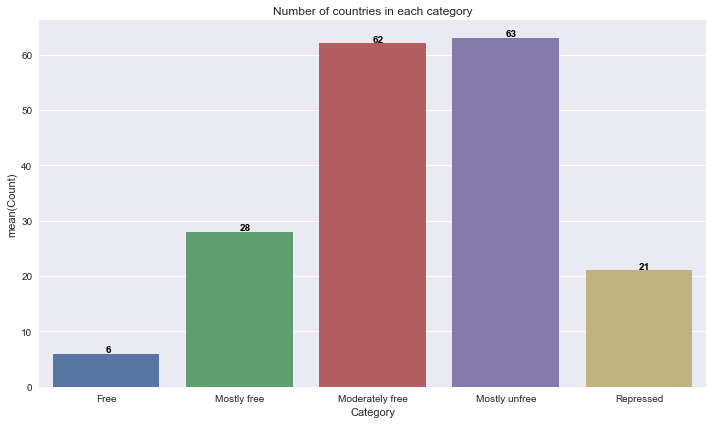

In [20]:
# Call the country_categorization function over the whole dataset
country_categorization(data18, "World-category")

Total number of country data: 53
Countries with index score of 80 and above: 0
Countries with index score between 80 and 70: 1
Countries with index score between 70 and 60: 9
Countries with index score between 60 and 50: 28
Countries with index score below 50: 13
Percentage of Countries that are 'free': 0.00%


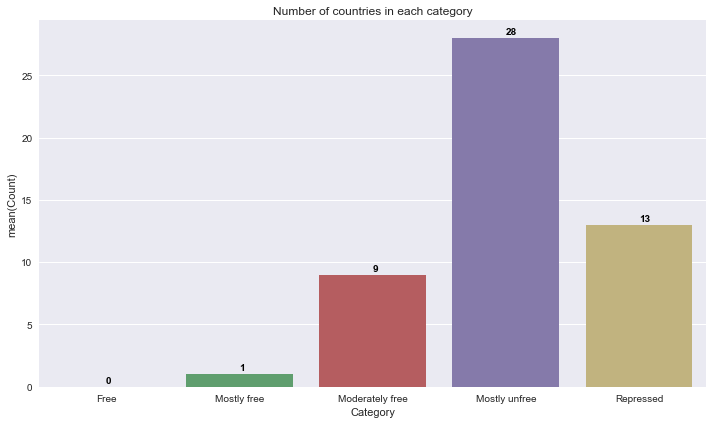

In [92]:
# Call the same country_categorization function over only African countries
data18_africa = data18.loc[data18['region'].isin(['North-Africa', 'Sub-Saharan-Africa'])]
#mydata_africa = mydata.loc[mydata['region'].isin(['North-Africa', 'Sub-Saharan-Africa'])]
#data17_africa = data17.loc[data17['region'].isin(['North-Africa', 'Sub-Saharan-Africa'])]

#data18_africa.head(n=5)

country_categorization(data18_africa, "Africa-category")
#country_categorization(data17_africa, "Africa-category-17")

In [25]:
# Average score of African nations in 2017
np.mean(data17_africa['score'].astype(float))


54.952352941176486

In [26]:
# Average score of African nations in 2018
np.mean(data18_africa['score'].astype(float))

54.460784313725505

In [27]:
# Function to plot a heatmap of correlations between features to help gain more insights
def data_correlations(df, title):
    temp_data = df.iloc[:,4:].astype(float)
    temp_data.head(5)
    print(temp_data.describe())
    correlation = temp_data.corr()
    
    # display the correlations
    plt.figure(figsize=(14,12))
    heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
    fig = heatmap.get_figure()
    title = title + ".png"
    fig.savefig(title)

            score  property_rights  judical_effectiveness  \
count  180.000000       185.000000             185.000000   
mean    61.074444        51.513514              46.911351   
std     11.165280        20.001385              20.275564   
min      5.800000         5.200000               5.000000   
25%     53.900000        36.700000              31.300000   
50%     61.450000        49.400000              45.200000   
75%     68.500000        65.900000              59.000000   
max     90.200000        98.400000              93.800000   

       government_integrity  tax_burden  government_spending  fiscal_health  \
count            185.000000  181.000000           183.000000     184.000000   
mean              42.059459   76.687845            63.526230      66.322826   
std               18.651502   13.411975            23.285365      31.176852   
min                7.500000    0.000000             0.000000       0.000000   
25%               28.300000   70.500000            50.5

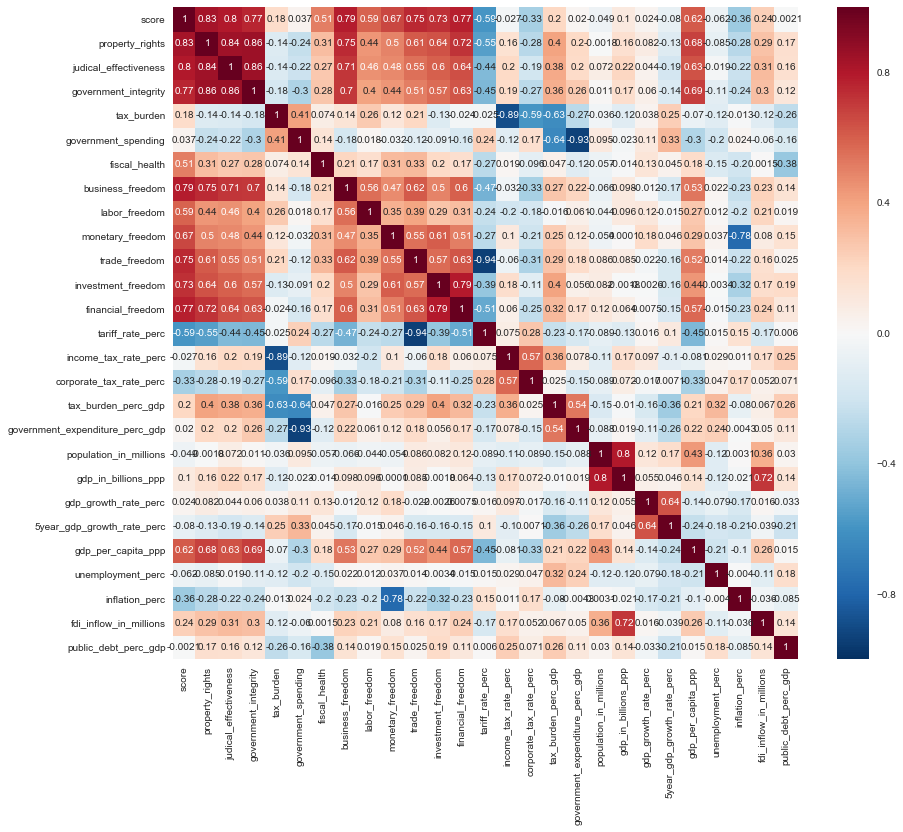

In [28]:
# Correlations with the World data
data_correlations(data18, "heatmap-world")

           score  property_rights  judical_effectiveness  \
count  51.000000        53.000000              53.000000   
mean   54.460784        37.867925              36.609434   
std     7.114382        13.154391              13.827888   
min    38.900000         5.200000              13.800000   
25%    50.200000        31.100000              28.200000   
50%    54.000000        35.500000              35.200000   
75%    58.500000        43.500000              44.000000   
max    75.100000        69.800000              79.600000   

       government_integrity  tax_burden  government_spending  fiscal_health  \
count             53.000000   52.000000            52.000000      52.000000   
mean              31.349057   73.567308            72.688462      54.405769   
std                9.508592    9.410126            19.167105      32.473020   
min               14.400000   44.800000             0.000000       0.000000   
25%               26.200000   69.325000            67.375000    

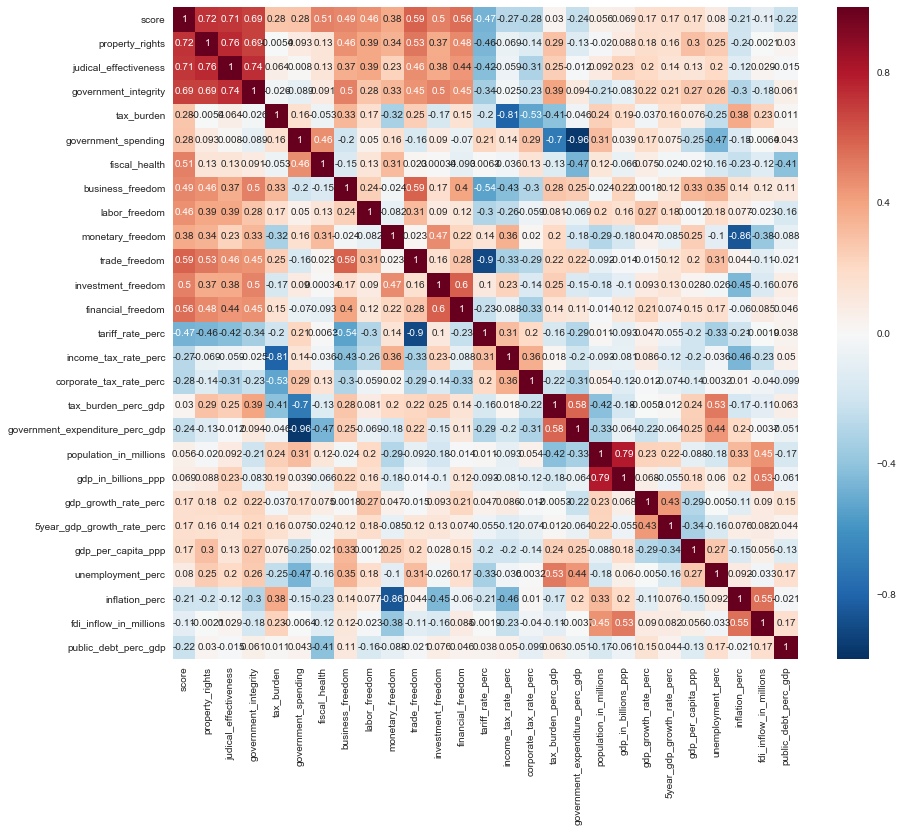

In [93]:
# Correlations in the Africa data
data_correlations(data18_africa, "Africa18-heatmap")

In [31]:
# Function to explore and visualize the relationship between 
# two variables that we are interested in exploring more
def explore_relation(df, value1, value2, title):
    # create a new dataframe containing just those two variables
    var = df.iloc[:,[value1,value2]].astype(float)
    #print(var.head(n=5))
    m = list(var)
    #print(m[0])
    
    grid_plot = sns.JointGrid(x=m[1], y=m[0], data=var, size=6)
    
    grid_plot = grid_plot.plot_joint(sns.regplot, scatter_kws={"s":10})
    
    grid_plot = grid_plot.plot_marginals(sns.distplot)
    
    title = title + ".png"
    grid_plot.savefig(title)
    

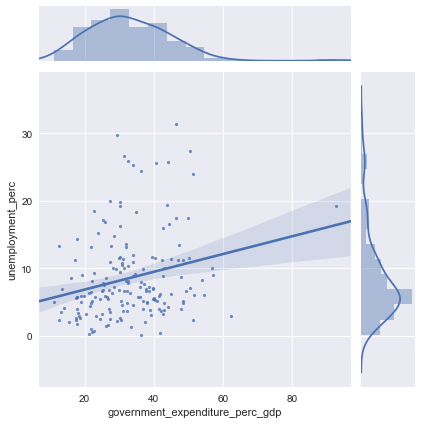

In [39]:
# You can try to see the relationship between any two variables
var1 = data18.columns.get_loc("unemployment_perc")
var2 = data18.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18, var1, var2, "World18-UnemplPerc-vs-GovnExpPerc")



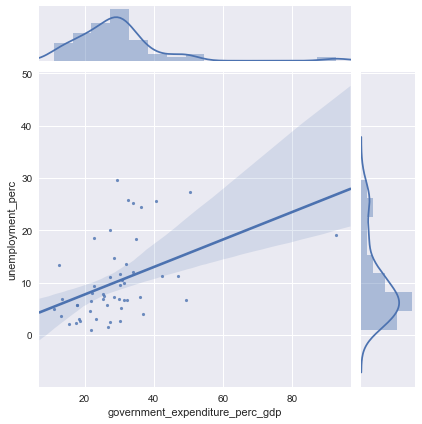

In [40]:
# You can try to see the relationship between any two variables of the Africa data
var1 = data18_africa.columns.get_loc("unemployment_perc")
var2 = data18_africa.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18_africa, var1, var2, "Africa18-UnemplPerc-vs-GovnExpPerc")

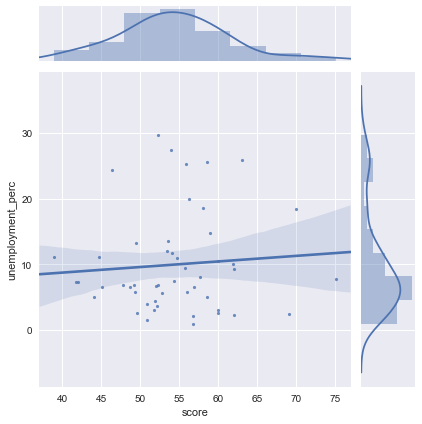

In [42]:
var1 = data18_africa.columns.get_loc("unemployment_perc")
var2 = data18_africa.columns.get_loc("score")
explore_relation(data18_africa, var1, var2, "Africa18-UnemplPerc-vs-Score")

Total number of country data: 45
Countries with index score of 80 and above: 2
Countries with index score between 80 and 70: 16
Countries with index score between 70 and 60: 21
Countries with index score between 60 and 50: 5
Countries with index score below 50: 0
Percentage of Countries that are 'free': 4.44%


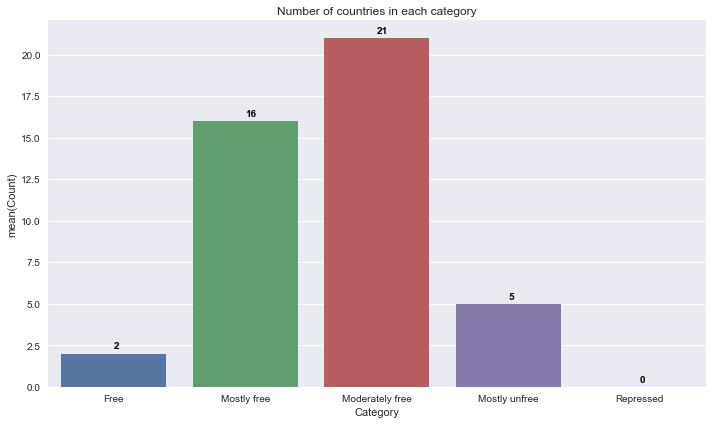

           score  property_rights  judical_effectiveness  \
count  44.000000        44.000000              44.000000   
mean   68.781818        69.086364              62.263636   
std     7.055273        14.680989              16.481873   
min    51.900000        39.500000              25.400000   
25%    64.200000        55.150000              56.000000   
50%    68.400000        68.750000              59.350000   
75%    74.550000        82.900000              75.050000   
max    81.700000        92.600000              93.800000   

       government_integrity  tax_burden  government_spending  fiscal_health  \
count             44.000000   44.000000            44.000000      44.000000   
mean              55.475000   72.031818            45.054545      81.370455   
std               19.757708   14.678124            20.031689      15.089586   
min               26.600000   41.400000             2.300000      36.100000   
25%               39.975000   61.075000            30.850000    

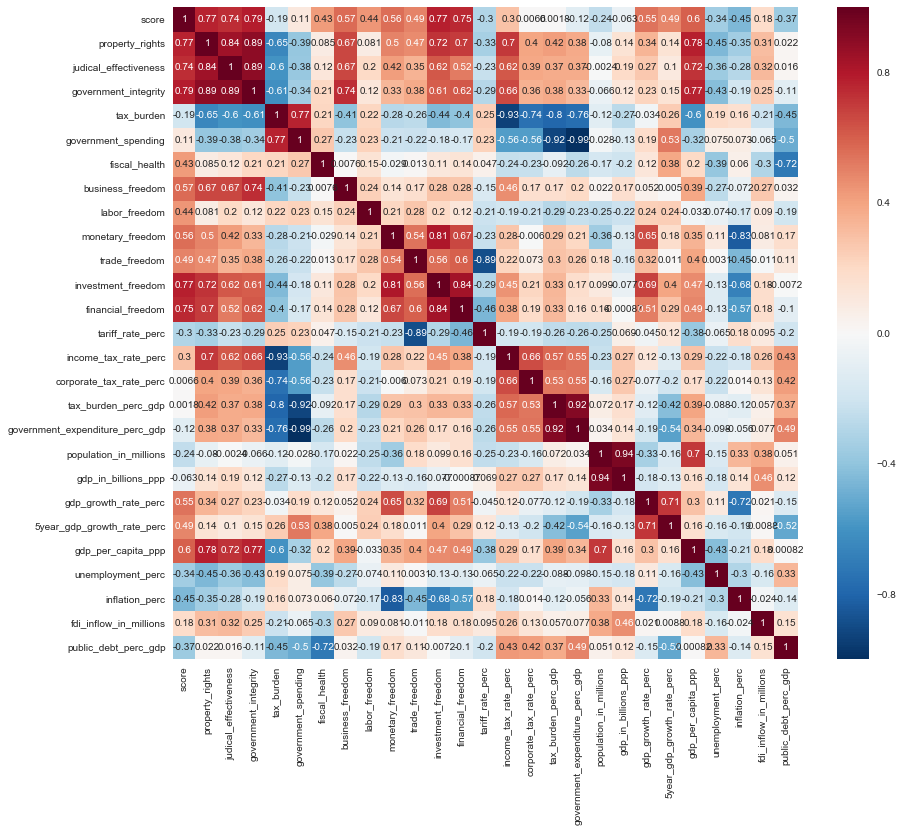

In [47]:
# Let's compare with the Europe countries only
data18_europe = data18.loc[data18['region'].isin(['Europe'])]
data17_europe = data17.loc[data18['region'].isin(['Europe'])]
mydata_europe = mydata.loc[mydata['region'].isin(['Europe'])]
# data18_europe.head(n=5)

country_categorization(data18_europe, "Europe-category")
data_correlations(data18_europe, "europe-heatmap")


In [48]:
np.mean(data18_europe['score'].astype(float))

68.7818181818182

In [49]:
np.mean(data17_europe['score'].astype(float))

67.98204545454546

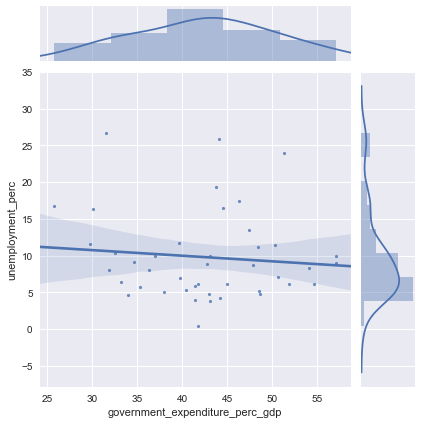

In [45]:
var1 = data18_europe.columns.get_loc("unemployment_perc")
var2 = data18_europe.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18_europe, var1, var2, "Europe18-UnemplPerc-vs-GovnExpPerc")

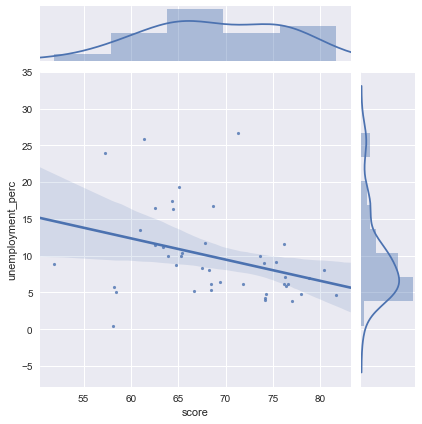

In [44]:
var1 = data18_europe.columns.get_loc("unemployment_perc")
var2 = data18_europe.columns.get_loc("score")
explore_relation(data18_europe, var1, var2, "Europe18-UnemplPerc-vs-Score")

In [50]:
# Look at Asia nations.
data18_asia = data18.loc[data18['region'].isin(['Asia-Pacific'])]
data17_asia = data17.loc[data18['region'].isin(['Asia-Pacific'])]

In [51]:
np.mean(data17_asia['score'].astype(float))

60.429302325581396

In [52]:
np.mean(data18_asia['score'].astype(float))

61.046511627906966

Total number of country data: 43
Countries with index score of 80 and above: 4
Countries with index score between 80 and 70: 5
Countries with index score between 70 and 60: 12
Countries with index score between 60 and 50: 19
Countries with index score below 50: 3
Percentage of Countries that are 'free': 9.30%


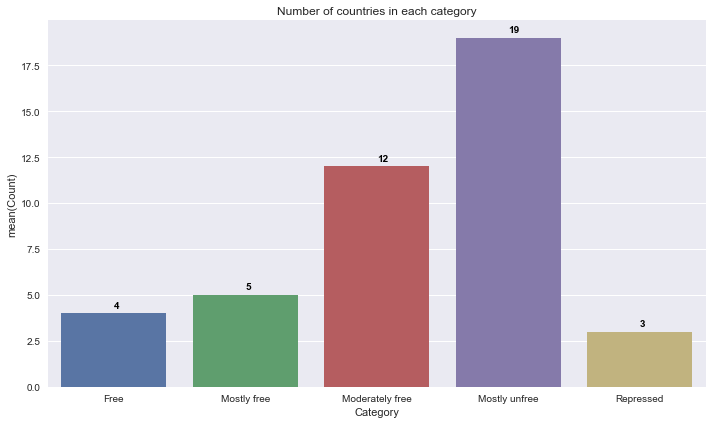

           score  property_rights  judical_effectiveness  \
count  43.000000        43.000000              43.000000   
mean   61.046512        52.786047              45.948837   
std    13.725894        20.844853              21.460655   
min     5.800000         5.200000               5.000000   
25%    54.000000        37.750000              33.300000   
50%    58.700000        49.300000              45.200000   
75%    68.100000        61.500000              57.700000   
max    90.200000        98.400000              93.400000   

       government_integrity  tax_burden  government_spending  fiscal_health  \
count             43.000000   43.000000            43.000000      43.000000   
mean              43.023256   81.167442            68.509302      73.523256   
std               19.347682   15.566474            24.226518      31.772763   
min               17.700000    0.000000             0.000000       0.000000   
25%               30.550000   75.700000            57.950000    

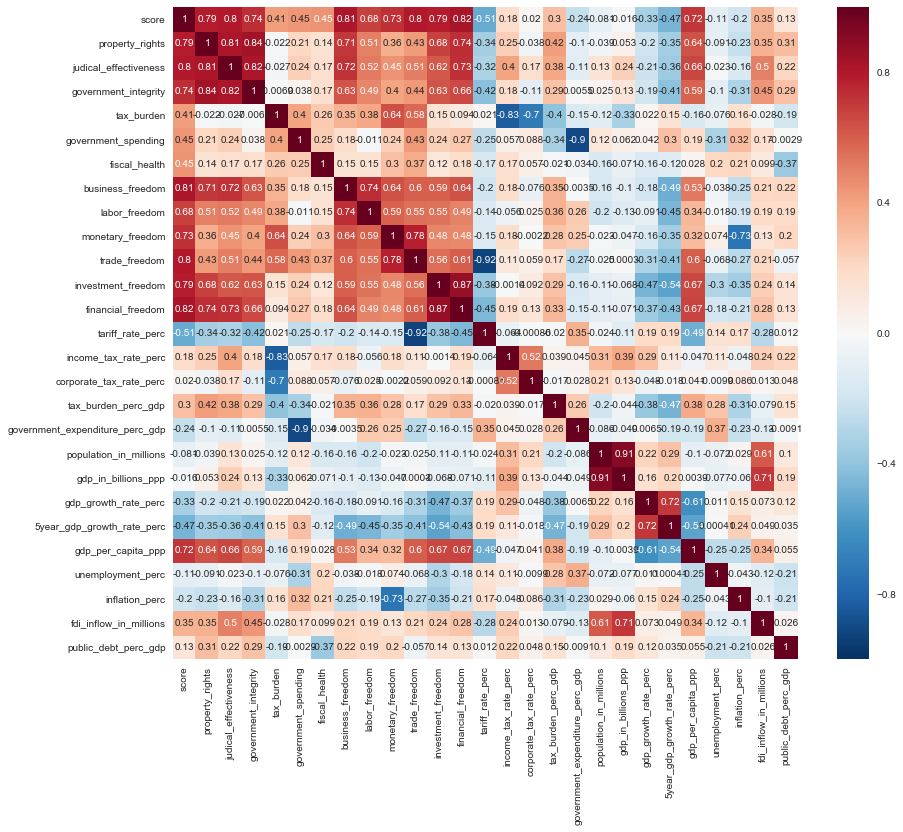

In [54]:
country_categorization(data18_asia, "Asia-categories")
data_correlations(data18_asia, "Asia-heatmap")

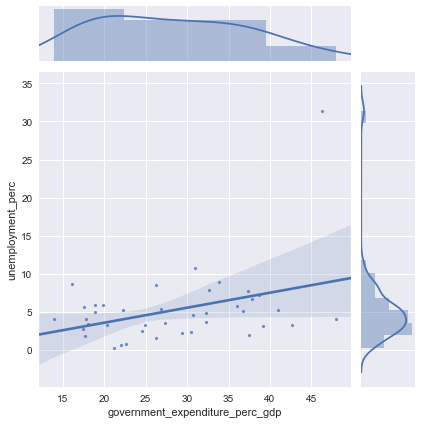

In [55]:
var1 = data18_asia.columns.get_loc("unemployment_perc")
var2 = data18_asia.columns.get_loc("government_expenditure_perc_gdp")
explore_relation(data18_asia, var1, var2, "Asia18-UnemplPerc-vs-GovnExpPerc")

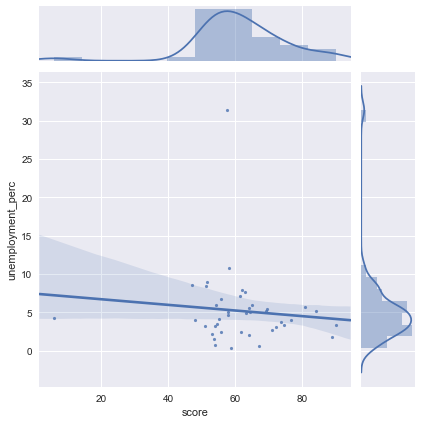

In [57]:
var1 = data18_asia.columns.get_loc("unemployment_perc")
var2 = data18_asia.columns.get_loc("score")
explore_relation(data18_asia, var1, var2, "Asia18-UnemplPerc-vs-Score")

In [74]:
# Look at world nations that are free and mostly free.
data18_free = data18.loc[data18['score'].astype(float) >= 80]
data18_free

,country_id,country_name,region,world_rank,score,property_rights,judical_effectiveness,government_integrity,tax_burden,government_spending,...,government_expenditure_perc_gdp,population_in_millions,gdp_in_billions_ppp,gdp_growth_rate_perc,5year_gdp_growth_rate_perc,gdp_per_capita_ppp,unemployment_perc,inflation_perc,fdi_inflow_in_millions,public_debt_perc_gdp
6,7,Australia,Asia-Pacific,5.0,80.9,78.7,93.4,77.4,63,61.2,...,36,24.3,1187.30,2.5,2.7,48899.10,5.7,1.3,48190.2,41.1
70,71,HongKong,Asia-Pacific,1.0,90.2,92.5,84.3,82.8,93.1,90.2,...,18,7.4,429.7,2.4,2.4,58321.60,3.4,2.6,108126,0.1
77,78,Ireland,Europe,6.0,80.4,87.7,79,79,76.1,69.6,...,31.9,4.7,324.9,7.8,8,69230.80,8.1,-0.2,22304.4,76.4
119,120,NewZealand,Asia-Pacific,3.0,84.2,95.1,88.4,95.7,70.5,49.5,...,41,4.7,177,3.4,2.9,37294.00,5.2,0.6,2291.6,29.5
146,147,Singapore,Asia-Pacific,2.0,88.8,98.4,90.9,91.2,90.4,90.6,...,17.7,5.6,492.6,2,3.3,87855.40,1.8,-0.5,61596.7,112
157,158,Switzerland,Europe,4.0,81.7,84.2,82.1,82.8,70.5,65.4,...,34,8.3,496,0.9,1.4,59560.70,4.6,-0.4,-26340.2,45.4


In [76]:
# let's also look at the outliers
# Function to remove any outliers and return a dataframe
def remove_outliers(df):
    df2 = df.iloc[:,4:].astype(float)
    # For each feature find the data points with extreme high or low values
    for feature in df2.keys():
        Q1 = np.nanpercentile(df2[feature], q=25)
        Q3 = np.nanpercentile(df2[feature], q=75)
        interquartile_range = Q3 - Q1
        step = 1.5 * interquartile_range
        
        # Display the outliers
        print("Data points considered outliers for the feature'{}':".format(feature))
        display(df2[~((df2[feature] > Q1 - step) & (df2[feature] <= Q3 + step))])
        
        # Optional: Select the indices for data points you wish to remove
        outliers = []
        
        # Remove the outliers direct, if any were specified
        df = df2.drop(df2.index[outliers]).reset_index(drop = True)
        
    return df

In [88]:
# Remove outliers from the dataset as this can affect the linear model 

# I have commented it out now for display purposes, but should uncomment to remove the outliers.

#data18_out_rm = remove_outliers(data18)
#data18_africa_out_rm = remove_outliers(data18_africa)
#data18_europe_out_rm = remove_outliers(data18_europe)
#data18_asia_out_rm = remove_outliers(data18_asia)



In [89]:
## --- BUILDING THE LINEAR MODEL FOR FURTHER ANALYSIS

from sklearn.linear_model import LinearRegression
# first fill the NAs as linear regression will not fit on that
# I select to fill with 0s
data18_out_rm = data18_out_rm.fillna(0)
data18_africa_out_rm = data18_africa_out_rm.fillna(0)
data18_europe_out_rm = data18_europe_out_rm.fillna(0)
data18_asia_out_rm = data18_asia_out_rm.fillna(0)

# Below, you can replace the RHS with the World, Africa, Europe or Asia data 
my_regr_data = data18_africa_out_rm 

# Get three features, i.e "all float variables", "the 12 economic freedom variables", and the "economic score"
# The dependent variable to predict is "unemployment rate"
X_all = my_regr_data.iloc[:, my_regr_data.columns != 'unemployment_perc'].astype(float)
X_freedoms = my_regr_data.iloc[:,1:13].astype(float)
X_score = my_regr_data['score'].astype(float)
y = my_regr_data['unemployment_perc'].astype(float)


In [90]:
# Function to run model on the different feature inputs and return the root mean squared errors, coefficients and intercept
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

def build_test_model(x_var, y_var):
    n_features = x_var.shape
    X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.20, random_state=0)
    
    #if type() == pandas.core.series.Series only one column then reshape both train and test
    #else
    if type(x_var) == pd.Series:
        X_train = X_train.values.reshape(-1, 1)
        X_test = X_test.values.reshape(-1, 1)
    else:
        pass
        
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    rmsTrain = sqrt(mean_squared_error(y_train, lm.predict(X_train)))
    
    # Let's use the linear model to predict unemployment on the test set
    y_pred = lm.predict(X_test)
    
    rmsTest = sqrt(mean_squared_error(y_test, y_pred))

    # Print the results
    print("Number of features inputted: {}".format(n_features))
    # print("------")
    print("Regression line slope: {}".format(lm.coef_)) 
    print("Regression line intercept: {}".format(lm.intercept_)) 
    print("Root Meat Squared Error on training set: {}".format(rmsTrain))
    print("Root Meat Squared Error on test set: {}".format(rmsTest))
    print("------END OF ONE FEATURE INPUT-----")

In [91]:
# Let's use the three features to build the linear model

feature_set = [X_score, X_freedoms, X_all]

for feature in feature_set:
    build_test_model(feature, y)

Number of features inputted: (53,)
Regression line slope: [ 0.00577678]
Regression line intercept: 10.374925524428601
Root Meat Squared Error on training set: 7.440625682342696
Root Meat Squared Error on test set: 7.909674793344108
------END OF ONE FEATURE INPUT-----
Number of features inputted: (53, 12)
Regression line slope: [ 0.00600407  0.03501991  0.14077049 -0.1819373  -0.12004762  0.0072323
  0.13567409  0.10126076 -0.00536213  0.15087196 -0.06296714  0.03637765]
Regression line intercept: 5.897878892368821
Root Meat Squared Error on training set: 5.446691244290058
Root Meat Squared Error on test set: 9.093388100552206
------END OF ONE FEATURE INPUT-----
Number of features inputted: (53, 26)
Regression line slope: [ -7.88039951e-01   2.06669852e-01   2.62362108e-01  -2.42349816e-03
  -3.32114947e-01   1.60847147e-01   7.26757215e-02  -1.46027619e-01
   9.29759696e-02  -4.91984166e-01   8.73140469e-01   1.68050142e-02
   5.02730680e-02   1.33081691e+00  -3.51092334e-01   4.460590

In [68]:
# Assessment

# Assessment and discussion of the above analysis results are discussed here: 
#  http://myriammunezero.com/economic-data-analysis-part1/ and
# http://myriammunezero.com/economic-data-analysis-part2/
